[A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576)

Code here follows the [TensorFlow](https://www.tensorflow.org/) implementation by Mark Chang found [here](https://github.com/ckmarkoh/neuralart_tensorflow).

**NOTE**: this notebook was tested with Python 3, but it _should_ also work with Python 2 as long as you have TensorFlow, six, and other required libraries. However, it hasn't been _tested_ with Python 2, so expect problems, and if you find one, open a pull request or file an issue, etc.

## Introduction to Deep Learning

What is deep learning? In short it is the use of **neural networks with many hidden layers**.

What is a neural network? It is a (non-linear) mathematical model. We need to a short digression for context. Let's rush through the ideas of:

* mathematical modeling
* regression
* classification

### Mathematical Modeling

A _mathemaical model_ is a system of equations or numerical recipes used as a proxy for another system. Examples of mathematical models include:

* stock market and weather simulation programs,
* budgeting spreadsheets
* physics equations

There is a lot of flexibility in the idea of a mathematical model, so don't get hung up on specific semantics.

### Regression

Suppose you had some data relating an independent variable to a dependent variable. In mathematical modeling which variable is dependent and which is independent can sometimes be difficult to say, but suppose we decided to look for a relationship between age and height. In this case it seems reasonable to assert that height is dependent on age, and not the other way around.

So, let's take some data by finding four individuals and plot their height versus their age - in other words, let's put age on the x-axis of a plot and height on the y-axis. How can we use this data to build a mathematical model that takes age as an input and produces a predicted height?

This is an example of a _regression_ problem - we want to predict a numerical outcome. In this case, we might choose to write down a simple linear model like

    height = [some factor] times age + [some other factor]
    
How do we determine what those factors are? There are numerical recipes to we can follow. The basic idea is to start with a "reasonable guess", look at the _error_ in the guess, and adjust our guesses to make the error smaller. We do this, generically, by taking the _derivative_ of the error function and moving our parameters in the direction of the gradient.

<img src="./figures/linear_regressor.png"></img>

### Classification

Another sort of problem we might like to model is _classifiction_ - given some attributes, we'd like to say what "category" an example belongs to. In this sort of problem we think less about dependent and independent variables, and more about just attributes.

For example, we might want to categorize dogs based on their length from nose to tail and height from ground to shoulder. It might be possible to again write down a linear model relating the two:

    height = [some factor] times length + [some other factor]
    
We again fit for these parameters, but now the goal is not to use one to predict the other, bu rather to say everything on one side of this line is in one class, and everything on the other side of the line is in the other.

<img src="./figures/linear_classifier.png"></img>

### Problems

Sometimes (all the time), we get data that doesn't fit our simplest models. Returning to the height vs age model, suppose we find a 5th person and add them to the model:

<img src="./figures/nonlinear_regressor_needed.png"></img>

What do we do here? We could consider adding more independent variables (e.g., gender, weight, eye color) - some will have more explanatory power than others! Now our model looks like

    height = [factor_1] * age + [factor_2] * gender + [factor_3] * weight + [factor_4]
    
How would we include gender here? Isn't it a binary option? There are tricks we can use to get around this issue that I won't go into now - the bottom line is we can use it here.

We could also make the model non-linear. For example, we could write:

    height = [factor_1] * age^2 + [factor_2] 
    
This may or may not work better. In this particular case, we would expect a quadractic model to break down except, perhaps, over very specific age ranges (the _range of validity_ of a model is always an important concern). But non-linear models in general are very powerful.

For example, no linear model could effectively separate these classes:

<img src="./figures/nonlinear_classifier.png"></img>

But with a non-linear model, separating them is trivial.

What if we wanted a model that could separate dogs by breed by looking at pictures? Could we show these pictures to a mathematical model and ask which is the husky and which is the eskimo dog?

<img src="./figures/dogs.png"></img>

There is a computer vision "challenge" organized around exactly this question - [ImageNet](http://image-net.org). Sadly this year was ImageNet's last year. It has played a key role in the evolution of deep learning.

For many years, people managed to beat the previous year's best ImageNet scores (where scores are computed based on how many pictures a computer algorithm could correctly identify). Then, in 2012, there was a _huge_ leap forward. This leap was based on a deep neural network.

Neural networks are non-linear models that operate by taking a set of inputs, applying a weight factor to each of them, adding the values up, and then applying a function to that sum to produce an output:

<img src="./figures/neuron.png"></img>

In principle, neural networks can approximate any function with enough nodes in their "hidden layer" (the nodes between the inputs and the output) - there is a theorem one may prove to sow this is true. However, we may have to make our network very, very wide to accomodate complex behavior. It can actually be more efficient to make a network "deep" by chaining together many hidden layers - if we use the output from one layer as the inputs to another, we can, in principle, make an arbitrarily "deep" network.

To fit, or _train_ a neural network, we use a trick called back-propagation. Essentially, this is the same as what we discussed before - one looks at the error on the predictions and takes the derivative of the objective function with respect to the parameters in the network. We call this "training a network" because typically need many, many examples to fit our full model. The reason we need so many events is because we often have a huge number of parameters in our network.

<img src="./figures/what_is_nn.png"></img>

One important problem when using a neural network on images is that a "naive" network that just connects neurons to all the pixels and assigns weights to everything regards these two images are completely distinct:

<img src="./figures/threes.png"></img>

But this the same image, only translated inside the "viewing window"!

It turns out we can manage this problem with an idea that is more than 20 years old - we can use a [convolutional neural net](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). The central idea is rather than giving each input its own unique weight, we will build a small "patch" and map it over the image so all the inputs _share the weights_. We will use multiple _feature maps_ (map many different patches at once) so we can find a variety of different structures:

<img src="./figures/convolutions.png"></img>

If we build a stack of these layers, we actually "shrink" the input image and move from a visual space into another space that we can think of as a semantic space. This is core to the network that [won ImageNet in 2012](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks) and ushered in the popularity of deep learning:

<img src="./figures/pyramid.png"></img>

The action of the "convolution" of these filters, or kernels, with the image depends on the values in the kernels. A variety of image processing techniques rely on this. For example, a kernel with a negative value in the center surrounded by positive values becomes an _edge detector_:

<img src="./figures/kernel_actions.png"></img>

The clever idea with deep convolutional neural networks for image analysis is we let the neural network _learn_ which filters are effective for the problem we're trying to solve, rather than guessing them.

One last trick we will need to mention here is that to contain the number of parameters in a network we sometimes use _pooling_ - this is a form of downsampling that we can use to reduce the dimensionality of a problem (at the price of some information loss).

<img src="./figures/pooling.png"></img>

In a sign of how fast things are moving with computer hardware, pooling is becoming less necessary as new GPUs with a lot of memory hit the market - but we use it here.

## Introduction to Style Transfer

Let's explore artistic style transfer. Why?

* Sort of a cool demonstration.
* It turns out to be very simple, technically - so we get a chance to see some of the machinery of a deep learning library work without needing a huge variety of functions from the library. In particular, we use pooling (so we need to see some tensor operations) and stochastic graident descent (so we need to see an optimizer), but we aren't building convolutions or making recurrent connections, etc.

We will use a pre-trained convolutional network built for object classification (in this case, the [2014 ImageNet competition](http://www.image-net.org/challenges/LSVRC/2014/results#clsloc)) and we will study activations in the model weights. Rather than varying the weights to achieve a task, we're actually going to vary the _input image_.

The key idea of [A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576) is that **representations of image style and content may both be found in the activations of layers in a convolutional neural network and these representations are _separable_** (we may manipulate them independently). 

The authors speculate about biological analogs to the mechanisms they employ here and argue that the ability to see and appreciate style is a _necessary consequence_ of being able to visually process images into high-level representations of _content_ (as opposed to collections of unordered colors and edges).

An important claim the paper makes is that as one progresses through the convolutional pyramid the input image is converted into representations that are increasingly concerned with the content of an image and less with the specific location of each pixel. Content representation is encoded in the activations of different filters in the network.

Image style is also built from the filter responses in each layer of the network. It uses the "_correlations_ between the different filter responses over the spatial extent of the feature maps" (emphasis added). One may define a stlye based on a single layer or any arbitrary number of layers. The authors argue that using the maximum number of layers produces the best stylistic image.

Because the direct values in a filter and the correlations between them are separable (to an extent), we can separate content and style, and manipulate them separately.

As evidence they offer a figure that shows image reconstruction based on the activations in a given layer. The image is suggestive of their conlcusions, if not definitive:

<img src='./figures/naas_fig1.png'>

_Image taken from https://arxiv.org/abs/1508.06576_ 

Here, as we go from (a) to (e) in the style reconstruction we are including first one, then two, then three, etc. layers when computing the correlations between different filter responses.

**Note:** we can recreate images like this (sort of) by turning off the parts of the cost function that affect style or content, and by choosing which layers from the pre-trained classifer we want to retain.

<img src='./figures/naas_fig3.png'>

_Image taken from https://arxiv.org/abs/1508.06576_ 

Here, as we traverse columns left to right, we are increasing the weight on the content when computing the loss function.

As we traverse rows from top to bottom, we are increasing the number of layers used in computing the style representation.

## Code

In [1]:
from __future__ import print_function
from __future__ import division
import tensorflow as tf
import numpy as np
import scipy.io
import scipy.misc
from skimage.transform import resize
from tensorflow.python.framework import ops  # used to be for reset graph - can just do with tf now
import os

import matplotlib.pyplot as plt
%matplotlib inline

We use a pre-trained 'VGG' ([Visual Geometry Group](http://www.robots.ox.ac.uk/~vgg/research/very_deep/)) model from Oxford to compute content and style representations. We will download the weights for the model (unless we have already downloaded them) and use them to initialize a network built in TensorFlow.

(It might be neat to try a different model - e.g., Google's Inception, etc.)

In the paper, the authors change the pooling from max pooling to average pooling. It is somewhat amazing this works and doesn't require re-training the network!

In [2]:
vggmodelfile = 'imagenet-vgg-verydeep-19.mat'
if not os.path.isfile(os.path.join('.', vggmodelfile)):
    import six.moves.urllib.request as request
    # use `dl=1` as part of query to force a download
    origin = ('https://www.dropbox.com/s/qy9gikdpuq95w8n/%s?dl=1' % vggmodelfile)
    print('Downloading VGG16 model from: %s' % origin)
    request.urlretrieve(origin, vggmodelfile)
else:
    print('VGG19 model', vggmodelfile, 'is available.')

VGG19 model imagenet-vgg-verydeep-19.mat is available.


## Image Preparation

We will pull content and style images to use for the demo from an online URL. In principle, you can use anything (although the image manipulaiton functions that prep the `600x800x3` images we need have not been _exhaustively_ tested, so if you have an image with too different a shape, it might not work).

In [3]:
image_dir = './images'
if os.path.isdir(image_dir):
    print('Image directory is ready...')
else:
    os.makedirs(image_dir)

source_image = 'fermilab-scenes.jpg'
source = os.path.join(image_dir, source_image)
        
if os.path.exists(source):
    print('Source image exists...')
else:
    import six.moves.urllib.request as request
    if source_image == 'fermilab-scenes.jpg':
        origin = ('https://www.dropbox.com/s/g5lnnm83fetngok/fermilab-scenes.jpg?dl=1')
    print('Downloading source image from: %s' % origin)
    request.urlretrieve(origin, source)
    
style_image = 'cezanne1.jpg'
style_image = 'Picasso.jpg'
style_image = 'StarryNight.jpg'
style = os.path.join(image_dir, style_image)

if os.path.exists(style):
    print('Style image exists...')
else:
    import six.moves.urllib.request as request
    if style_image == 'cezanne1.jpg':
        origin = ('https://www.dropbox.com/s/rv6ijc229b4t2d4/cezanne1.jpg?dl=1')
    elif style_image == 'StarryNight.jpg':
        origin = ('https://www.dropbox.com/s/2hya8bqfoq3f75l/StarryNight.jpg?dl=1')
    print('Downloading style image from: %s' % origin)
    request.urlretrieve(origin, style)

Image directory is ready...
Source image exists...
Style image exists...


Now, let's make an output directory to store trained/translated images. We'll use the filename to build the directory, so if the files you're using have very complex names, you might choose to rename them first.

In [4]:
source_root = source_image.split('.')[0]
style_root = style_image.split('.')[0]

out_dir = './results_' + source_root + '_' + style_root
if not os.path.exists(out_dir):
    print('Making directory %s' % out_dir)
    os.mkdir(out_dir)
print('Results directory %s is available.' % out_dir)

Making directory ./results_fermilab-scenes_StarryNight
Results directory ./results_fermilab-scenes_StarryNight is available.


VGG expects `600x800x3` images, and it expects the images to be 'normalized' (we must subtract the RGB means of the training set used to train the VGG model itself (which was ImageNet 2014) - we just need these 'arbitrary' numbers, or we need to retrain our own version of VGG, etc.).

In [5]:
IMAGE_W = 800   # 1.333 aspect ratio
IMAGE_H = 600
# TF tensors are (batch, H, W, D) - here we need the D={RGB}
VGG_MEAN_VALUES = np.array([123, 117, 104]).reshape((1,1,1,3))

Now we'll define some plotting functions for convenience:

In [6]:
def imshow_clean(img, interpolation=None):
    """
    show an image with no axes (looks nicer for looking at pictures, etc.)
    """
    fig = plt.figure()
    ax = plt.gca()
    ax.axis('off')
    im = ax.imshow(img, interpolation=interpolation)
    return im

In [7]:
def show_img_pair(raw, normed, 
                  raw_title='Raw Image', normed_title='Normalized Image', interpolation=None,
                  raw_type='uint8', normed_type='int8'):
    """
    use this method to display raw and normalized images by default, but can just show pairs generally.
    we have a base title for each image and additionally attach the dimensions (height x width)
    """
    show_norm = normed
    if len(normed.shape) == 4:
        show_norm = normed[0]
    
    fig = plt.figure(figsize=(22,12))
    gs = plt.GridSpec(1, 2)
    ax = plt.subplot(gs[0])
    ax.axis('off')
    im = ax.imshow(raw.astype(raw_type), interpolation=interpolation)
    plt.title(raw_title + ': {} x {}'.format(raw.shape[0],raw.shape[1]))
    ax = plt.subplot(gs[1])
    ax.axis('off')
    im = ax.imshow(show_norm.astype(normed_type), interpolation=interpolation)
    plt.title(normed_title + ': {} x {}'.format(show_norm.shape[0],show_norm.shape[1]))

Now, we will define a series of functions that transform roughly arbitrary color images into the shape needed to use with VGG. **Be a bit careful with arbitrary images, you may need to tweak these functions, etc.** For example, right now things are set up to work only with images that are _wider than they are tall_...

In [8]:
def crop_by_aspectr(img, aspect_ratio=1.3333, tolerance=0.01):
    """
    currently works ONLY FOR IMAGES THAT ARE WIDER THAN THEY ARE TALL
    * if too tall, remove segments from top and bottom
    * if too wide, remove segments from left and right
    """
    if aspect_ratio <= 1 or img.shape[0] == img.shape[1]:
        print('this function is set up for images wider than they are tall')
        cropped_img = img[:, :, :]
        return cropped_img
    img_shape = img.shape
    taller_than_wide = img_shape[0] > img_shape[1]
    if taller_than_wide:
        new_h = int(img_shape[1] / aspect_ratio)
        extra = int((img_shape[0] - new_h) / 2)
        cropped_img = img[extra: new_h + extra, :, :]
    else:
        new_w = int(img_shape[0] * aspect_ratio)
        extra = int((img_shape[1] - new_w) / 2)
        cropped_img = img[:, extra: new_w + extra, :]
    return cropped_img

In [9]:
def resizer(img, imgh=600, imgw=800, scale=255):
    """
    here, the default scale assumes we are rescaling for uint8 (8 bits expected by VGG); if you have to 
    `resize` an image, the elements are re-scaled into the range $[0, 1]$. Be careful to scale back to 
    0 to 255.
    """
    img_shape = img.shape
    if len(img_shape) == 2:
        img_resized = scale * resize(img, (imgh, imgw))
    elif len(img_shape) == 3:
        img_resized = scale * resize(img, (imgh, imgw, 3))
    else:
        print('invalid image dimensions, image shape =', img_shape)
        
    return img_resized

In TensorFlow, _image_ tensor shapes should be : `Batch-size x H x W x NChannels` (where `NChannels == 3` at input for RGB images, and equals the number of filter maps as we progress through the network). Somewhat confusingly, _convolutional kernel_ tensor shapes are different, `K_H x K_W x NF_in x NF_out`, where `K_H x K_W` gives the kernel's height and width, while `NF_in x NF_out` gives the number of in and output filters/channels. Pooling kernel shapes are `Batch-size x H x W x NChannels` (if first dimension is larger than 1, I believe we are combining images).

We will be using a pre-trained VGG16 model here, so we need to resize our images appropriately. In order to use the VGG model, we will also need to subtract the mean of the training dataset for that model.

In [10]:
def tensorfy_and_normalize(img, mean_values=VGG_MEAN_VALUES):
    """
    take `H x W x NChannels` images and prepend the 'batch size' dimension;
    subtract a set of mean values (computed from VGG training set)
    """
    img_shape = img.shape
    assert(len(img_shape) == 3)   # we need rgb images to work with VGG anyway
    img_resized = img[np.newaxis, :, :, :]
    img_normalized = img_resized - mean_values
    return img_normalized

Now, let's load and prepare our content ('source') image, and save a copy of the re-sized image for later comparison:

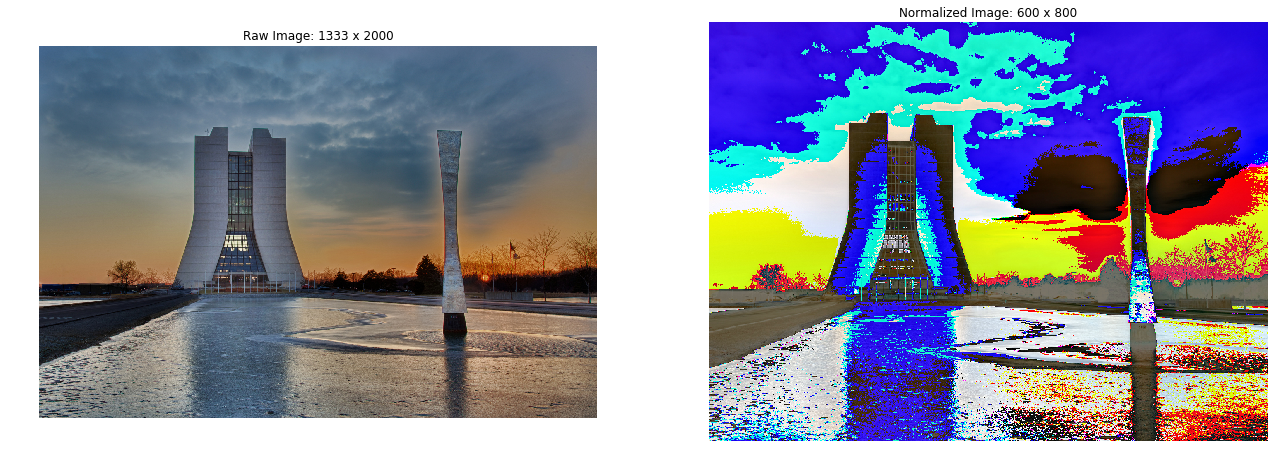

In [11]:
raw_source = plt.imread(source)
cropped_source = crop_by_aspectr(raw_source)
resized_source = resizer(cropped_source)

path = out_dir + '/' + source_root + '_resized.png'
scipy.misc.imsave(path, resized_source.astype('uint8'))
    
normed_source = tensorfy_and_normalize(resized_source)
show_img_pair(raw_source, normed_source)

As a sanity check, let's be sure that if we add the `VGG_MEAN_VALUES` back, we get the image we expect:

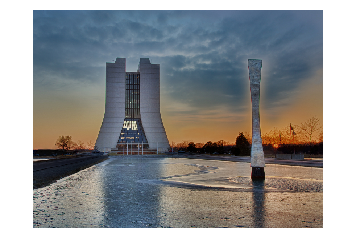

In [12]:
imshow_clean((normed_source + VGG_MEAN_VALUES)[0].astype('uint8'))

Now, let's do the same for the style image:

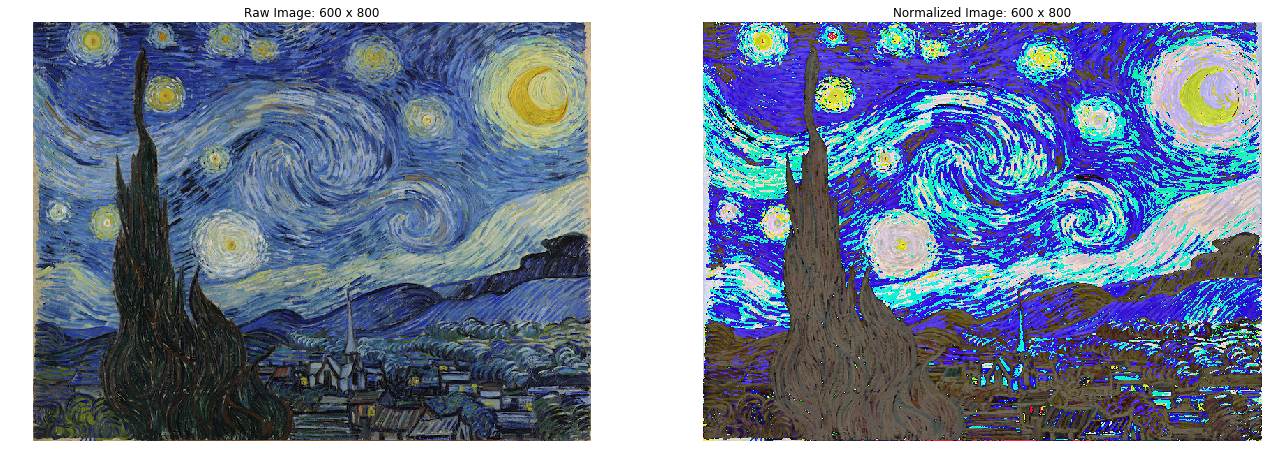

In [13]:
raw_style = plt.imread(style)
cropped_style = crop_by_aspectr(raw_style)
resized_style = resizer(cropped_style)

path = out_dir + '/' + style_root + '_resized.png'
scipy.misc.imsave(path, resized_style.astype('uint8'))

normed_style = tensorfy_and_normalize(resized_style)
show_img_pair(raw_style, normed_style)

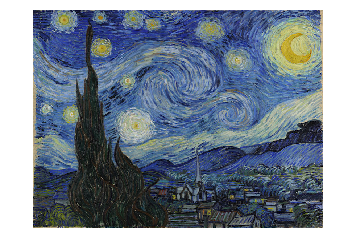

In [14]:
imshow_clean((normed_style + VGG_MEAN_VALUES)[0].astype('uint8'))

Let's rename the images for convenience / simplicity...

In [15]:
source_img = normed_source
style_img = normed_style

## Network Definition

Now, let's define a utility function for building layers and chaining them together:

In [16]:
def build_net(ntype, nin, rwb=None):
    """
    utility function for building network layers
    * ntype == network layer type (string, 'conv' or 'pool')
    * nin == network input layer (the object itself)
    * rwb == weights and biases
    """
    # `strides` basically describe how far the kernel steps in each tensor dimension
    # `ksize` describes the size of the pooling region
    # If we use `SAME` padding, the filter is allowed to go off the edge by half the filter size on each side,
    # so we would expect an unchanged image size with stride=1 and a (1/2)x(1/2) for stride=2.
    if ntype == 'conv':
        return tf.nn.relu(tf.nn.conv2d(nin, rwb[0], strides=[1, 1, 1, 1], padding='SAME') + rwb[1])
    elif ntype == 'pool':
        return tf.nn.avg_pool(nin, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### Detour on kernels, strides, and padding

`ksize` tells us about kernel size (4-tensor), and strides tells us how far we move the the kernel with each "step" when mapping it across the image. Padding is explained in the TF [documentation for convolution](https://www.tensorflow.org/api_docs/python/nn/convolution#convolution). 

Let's take a detour and demonstrate it with the pooling operation:

In [17]:
# super-simple "graph" to demonstrate pooling
# X shape of None x 6 x 6 x 1 -> any number of 6x6 tensors that are "1-deep" (e.g., grayscale)
X = tf.placeholder(tf.float32, shape=(None, 6, 6, 1), name='X')
Y_same = tf.nn.avg_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
Y_valid = tf.nn.avg_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

TensorFlow separates graph definition and computation into two steps - we must execute operations within a _Session_.

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

We need to pass a tensor with actual data into our "graph" to see how it works.

In [19]:
X_vals = np.arange(6*6).reshape(1, 6, 6, 1)
# print(X_vals)

To get a value we must run the computation inside the `Session` we created earlier. `feed_dict` tells TF what values to plug into the placeholder we used to start the graph:

In [20]:
Y_same_vals = sess.run(Y_same, feed_dict={X: X_vals})
print(Y_same_vals.shape)
print(Y_same_vals)

(1, 3, 3, 1)
[[[[  3.5]
   [  5.5]
   [  7.5]]

  [[ 15.5]
   [ 17.5]
   [ 19.5]]

  [[ 27.5]
   [ 29.5]
   [ 31.5]]]]


In [21]:
Y_valid_vals = sess.run(Y_valid, feed_dict={X: X_vals})
print(Y_valid_vals.shape)
print(Y_valid_vals)

(1, 3, 3, 1)
[[[[  3.5]
   [  5.5]
   [  7.5]]

  [[ 15.5]
   [ 17.5]
   [ 19.5]]

  [[ 27.5]
   [ 29.5]
   [ 31.5]]]]


In this case, the tensors came out the same because the kernel and stride sizes conspired with the image size to keep the filter mapping "inside" the tensor. What does this mapping look like (with a lazy figure)?

<img src='./figures/pooling_examp.png'>

Let's try again with a different stride to see if we can get a better sense for the difference.

First, let's 'reset' the graph, just to keep things simple:

In [22]:
tf.reset_default_graph()

Let's look at a different stride to see if the pooling ops behave differently:

In [23]:
X = tf.placeholder(tf.float32, shape=(None, 6, 6, 1), name='X')
Y_same = tf.nn.avg_pool(X, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
Y_valid = tf.nn.avg_pool(X, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')

In [25]:
# we are using the default graph, so we have to re-initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [26]:
Y_same_vals = sess.run(Y_same, feed_dict={X: X_vals})
print(Y_same_vals.shape)
print(Y_same_vals)

(1, 6, 6, 1)
[[[[  3.5]
   [  4.5]
   [  5.5]
   [  6.5]
   [  7.5]
   [  8. ]]

  [[  9.5]
   [ 10.5]
   [ 11.5]
   [ 12.5]
   [ 13.5]
   [ 14. ]]

  [[ 15.5]
   [ 16.5]
   [ 17.5]
   [ 18.5]
   [ 19.5]
   [ 20. ]]

  [[ 21.5]
   [ 22.5]
   [ 23.5]
   [ 24.5]
   [ 25.5]
   [ 26. ]]

  [[ 27.5]
   [ 28.5]
   [ 29.5]
   [ 30.5]
   [ 31.5]
   [ 32. ]]

  [[ 30.5]
   [ 31.5]
   [ 32.5]
   [ 33.5]
   [ 34.5]
   [ 35. ]]]]


So here, `SAME` goes "off the edge" on the right to keep the overall tensor the same size...

In [27]:
Y_valid_vals = sess.run(Y_valid, feed_dict={X: X_vals})
print(Y_valid_vals.shape)
print(Y_valid_vals)

(1, 5, 5, 1)
[[[[  3.5]
   [  4.5]
   [  5.5]
   [  6.5]
   [  7.5]]

  [[  9.5]
   [ 10.5]
   [ 11.5]
   [ 12.5]
   [ 13.5]]

  [[ 15.5]
   [ 16.5]
   [ 17.5]
   [ 18.5]
   [ 19.5]]

  [[ 21.5]
   [ 22.5]
   [ 23.5]
   [ 24.5]
   [ 25.5]]

  [[ 27.5]
   [ 28.5]
   [ 29.5]
   [ 30.5]
   [ 31.5]]]]


... but `VALID` requires the kernel to stay entirely in-bounds. This means the output tensor must shrink.

Ok, with that demo over, let's reset the graph. Before we do, we can inspect it:

In [28]:
[op.name for op in tf.get_default_graph().get_operations()]

['X', 'AvgPool', 'AvgPool_1', 'init', 'init_1']

In [29]:
tf.reset_default_graph()

In [30]:
[op.name for op in tf.get_default_graph().get_operations()]

[]

### VGG

Now, let's define a funciton we can use to extract the model parameters from the pre-trained VGG file we downloaded:

In [31]:
def get_weight_bias(vgg_layers, i):
    """
    utility function to get weights and bias values from the layers of our pre-built vgg19 model;
    we set the weights as `constant` to indicate they should not be trainable.
    """
    weights = vgg_layers[i][0][0][0][0][0]
    weights = tf.constant(weights)
    bias = vgg_layers[i][0][0][0][0][1]
    bias = tf.constant(np.reshape(bias, (bias.size)))
    return weights, bias

And, now for the network:

In [32]:
def build_vgg19(path):
    """
    build the VGG DNN - note that the **input** is a `tf.Variable` - this is what we will train!
    """
    net = {}
    vgg_rawnet = scipy.io.loadmat(path)
    vgg_layers = vgg_rawnet['layers'][0]
    net['input'] = tf.Variable(np.zeros((1, IMAGE_H, IMAGE_W, 3)).astype('float32'))
    net['conv1_1'] = build_net('conv', net['input'], get_weight_bias(vgg_layers, 0))
    net['conv1_2'] = build_net('conv', net['conv1_1'], get_weight_bias(vgg_layers, 2))
    net['pool1'] = build_net('pool', net['conv1_2'])
    net['conv2_1'] = build_net('conv', net['pool1'], get_weight_bias(vgg_layers, 5))
    net['conv2_2'] = build_net('conv', net['conv2_1'], get_weight_bias(vgg_layers, 7))
    net['pool2'] = build_net('pool', net['conv2_2'])
    net['conv3_1'] = build_net('conv', net['pool2'], get_weight_bias(vgg_layers, 10))
    net['conv3_2'] = build_net('conv', net['conv3_1'], get_weight_bias(vgg_layers, 12))
    net['conv3_3'] = build_net('conv', net['conv3_2'], get_weight_bias(vgg_layers, 14))
    net['conv3_4'] = build_net('conv', net['conv3_3'], get_weight_bias(vgg_layers, 16))
    net['pool3'] = build_net('pool', net['conv3_4'])
    net['conv4_1'] = build_net('conv', net['pool3'], get_weight_bias(vgg_layers, 19))
    net['conv4_2'] = build_net('conv', net['conv4_1'], get_weight_bias(vgg_layers, 21))
    net['conv4_3'] = build_net('conv', net['conv4_2'], get_weight_bias(vgg_layers, 23))
    net['conv4_4'] = build_net('conv', net['conv4_3'], get_weight_bias(vgg_layers, 25))
    net['pool4'] = build_net('pool', net['conv4_4'])
    net['conv5_1'] = build_net('conv', net['pool4'], get_weight_bias(vgg_layers, 28))
    net['conv5_2'] = build_net('conv', net['conv5_1'], get_weight_bias(vgg_layers, 30))
    net['conv5_3'] = build_net('conv', net['conv5_2'], get_weight_bias(vgg_layers, 32))
    net['conv5_4'] = build_net('conv', net['conv5_3'], get_weight_bias(vgg_layers, 34))
    net['pool5'] = build_net('pool', net['conv5_4'])
    return net

Now we may compute loss functions.

In order to visualize the encoded image information, we use gradient descent on the pixel values in a white-noise image to find a new image that matches the in-network responses of the original image. So, for the image content we define the error as the squared difference between the feature representations of the 'source' and 'target' images: 

In [33]:
def build_content_loss(p, x):
    """
    here, p has shape (batch, h, w, n-channels)
    
    * p is an evaluated TF tensor or a ndarray
    * x is a TF placeholder
    """
    M = p.shape[1] * p.shape[2]   # h x w
    N = p.shape[3]                # n-channels
    loss = (1. / (2 * N**0.5 * M**0.5)) * tf.reduce_sum(tf.pow((x - p), 2))
    return loss

**Note:** the paper defines the content loss slightly differently (no 'normalizing' factor that is a function of image size and depth). However, we include one here to scale down the absolute value of the loss and keep it closer to the style loss.

In order to define the style loss, we need to first define a matrix $F^{l} \in \mathcal{R}^{N_l \times M_l}$, where $N_l$ counts the number of filter maps and $M_l$ is the height times the width of the filter map (basically, the 1-d re-arrangment of the 2-d information). $F^{l}_{ij}$ is the activation of the $i$th filter at position $j$ in layer $l$.

Next we will use $F^{l}$ to define computations for the [Gram matrix](https://en.wikipedia.org/wiki/Gramian_matrix), $G^l \in \mathcal{R}^{N_l \times N_l}$, with $N_l$ equal to the number of filter maps in layer $l$, and $G^{l}_{ij}$ equal to the inner product between the vectorized feature maps $i$ and $j$ in layer $l$,

\begin{equation}
G^{l}_{ij} = \sum_k F^{l}_{ik} F^{l}_{jk}
\end{equation}

If the vectors are centered random variables, the Gram matrix is roughly proportional to the covariance matrix, with additional scaling proporitonal to the number of elements in the vectors. Here, we are computing the Gram using the activations of a layer with themselves - so **we are looking at the covariance between activations in different filter maps.**

We define two versions of the matrix (computing function). First, we define a "TensorFlow version," that expects TF variables that constructs a graph element. Second, we define a "NumPy version" that expects NumPy arrays and computes a fixed value (based on the initial network weights).

In [34]:
def gram_matrix(x, area, depth):
    """
    input/evaluate with TF tensors
    
    here we take a tensor of shape (1, h, w, n) and reshape it to (h * w, n),
    and then compute the inner product of the new tensor with itself
    """
    x1 = tf.reshape(x, (area, depth))
    g = tf.matmul(tf.transpose(x1), x1)
    return g

In [35]:
def gram_matrix_val(x, area, depth):
    """
    numpy version of the `gram_matrix` method (may be evaluated outside a TF `Session`)
    
    here we take a ndarray of shape (1, h, w, n) and reshape it to (h * w, n),
    and then compute the inner product of the new ndarray with itself
    """
    x1 = x.reshape(area, depth)
    g = np.dot(x1.T, x1)
    return g

Let's just look at that with a few examples:

In [36]:
x_test = np.array([1] * 18).reshape(1, 3, 3, 2)
print(x_test)

[[[[1 1]
   [1 1]
   [1 1]]

  [[1 1]
   [1 1]
   [1 1]]

  [[1 1]
   [1 1]
   [1 1]]]]


In [37]:
x_test_gram = gram_matrix_val(x_test, 3*3, 2)
print(x_test_gram)

[[9 9]
 [9 9]]


In [38]:
x_test = np.array([1, 2] * 9).reshape(1, 3, 3, 2)
print(x_test)

[[[[1 2]
   [1 2]
   [1 2]]

  [[1 2]
   [1 2]
   [1 2]]

  [[1 2]
   [1 2]
   [1 2]]]]


In [39]:
x_test_gram = gram_matrix_val(x_test, 3*3, 2)
print(x_test_gram)

[[ 9 18]
 [18 36]]


In [40]:
x_test = np.array([1, -1] * 9).reshape(1, 3, 3, 2)
print(x_test)

[[[[ 1 -1]
   [ 1 -1]
   [ 1 -1]]

  [[ 1 -1]
   [ 1 -1]
   [ 1 -1]]

  [[ 1 -1]
   [ 1 -1]
   [ 1 -1]]]]


In [41]:
x_test_gram = gram_matrix_val(x_test, 3*3, 2)
print(x_test_gram)

[[ 9 -9]
 [-9  9]]


In [42]:
x_test = np.random.normal(loc=0.0, scale=1.0, size=(1, 3, 3, 2))
print(x_test)

[[[[-0.61758927  1.42564551]
   [ 0.01867712  0.4820433 ]
   [-0.45671261 -0.38471486]]

  [[ 0.85051061 -0.35459253]
   [-0.01739602 -0.75821573]
   [ 0.38005406 -0.56918268]]

  [[ 1.75466942  0.88260624]
   [-1.29347486 -0.39153942]
   [ 0.05130095 -0.0516538 ]]]]


In [43]:
x_test_gram = gram_matrix_val(x_test, 3*3, 2)
print(x_test_gram)

[[ 6.21303753  0.85200767]
 [ 0.85200767  4.37239727]]


In [44]:
x_test = np.random.normal(loc=0.0, scale=1.0, size=(1, 10, 10, 2))
x_test_gram = gram_matrix_val(x_test, 10 * 10, 2)
print(x_test_gram)

[[ 106.427978      4.68113141]
 [   4.68113141   95.02580083]]


Okay, now we may compute the style loss:

In [45]:
def build_style_loss(a, x):
    """
    here, a has shape (batch, h, w, n-channels)
    
    * a is an evaluated TF tensor or a ndarray
    * x is a TF placeholder
    """
    M = a.shape[1] * a.shape[2]    # h x w
    N = a.shape[3]                 # n-channels
    A = gram_matrix_val(a, M, N)   
    G = gram_matrix(x, M, N)
    loss = (1. / (4 * N**2 * M**2)) * tf.reduce_sum(tf.pow((G - A), 2))
    return loss

In [46]:
tf.reduce_sum(x_test_gram).eval(session=tf.Session())  # "throwaway" session

210.81604165675571

Now, with helper functions set, let's perform the style transfer.

In [47]:
tf.reset_default_graph()

In [48]:
net = build_vgg19(vggmodelfile)

In [49]:
[op.name for op in tf.get_default_graph().get_operations()]

['Variable/initial_value',
 'Variable',
 'Variable/Assign',
 'Variable/read',
 'Const',
 'Const_1',
 'Conv2D',
 'add',
 'Relu',
 'Const_2',
 'Const_3',
 'Conv2D_1',
 'add_1',
 'Relu_1',
 'AvgPool',
 'Const_4',
 'Const_5',
 'Conv2D_2',
 'add_2',
 'Relu_2',
 'Const_6',
 'Const_7',
 'Conv2D_3',
 'add_3',
 'Relu_3',
 'AvgPool_1',
 'Const_8',
 'Const_9',
 'Conv2D_4',
 'add_4',
 'Relu_4',
 'Const_10',
 'Const_11',
 'Conv2D_5',
 'add_5',
 'Relu_5',
 'Const_12',
 'Const_13',
 'Conv2D_6',
 'add_6',
 'Relu_6',
 'Const_14',
 'Const_15',
 'Conv2D_7',
 'add_7',
 'Relu_7',
 'AvgPool_2',
 'Const_16',
 'Const_17',
 'Conv2D_8',
 'add_8',
 'Relu_8',
 'Const_18',
 'Const_19',
 'Conv2D_9',
 'add_9',
 'Relu_9',
 'Const_20',
 'Const_21',
 'Conv2D_10',
 'add_10',
 'Relu_10',
 'Const_22',
 'Const_23',
 'Conv2D_11',
 'add_11',
 'Relu_11',
 'AvgPool_3',
 'Const_24',
 'Const_25',
 'Conv2D_12',
 'add_12',
 'Relu_12',
 'Const_26',
 'Const_27',
 'Conv2D_13',
 'add_13',
 'Relu_13',
 'Const_28',
 'Const_29',
 'Conv2D

Let's make a new session to go with the reset and rebuilt graph:

In [50]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

We define a white noise image to use as a starting point (we will actually cheat and 'mix' some of the starting image into this one to help the network out): 

In [51]:
noise_img = np.random.uniform(-20, 20, (1, IMAGE_H, IMAGE_W, 3)).astype('float32')

We use a high level in the network for content and multuple levels for style. We could switch to a different (probably higher) level for the content if we wished. We can also edit the style list to get different results... perhaps experiment with these?

noise image :  -20.0 20.0
source image:  -123.0 125.941768229
src+vgg img :  0.0 246.032977604
combo image :  -50.7433163834 49.6857926865
cmb+vgg img :  58.8535841904 171.093989607


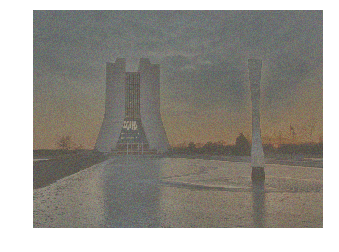

In [52]:
# choice in the paper (paper noise ratio and style strengths not really known)
CONTENT_LAYERS = [('conv4_2', 1.)]   
STYLE_LAYERS = [('conv1_1', 1.), ('conv2_1', 1.), ('conv3_1', 1.), ('conv4_1', 1.), ('conv5_1', 1.)]
STYLE_STRENGTH = 500
INI_NOISE_RATIO = 0.7

# choice in the paper, but with lower style strength
# CONTENT_LAYERS = [('conv4_2', 1.)]   
# STYLE_LAYERS = [('conv1_1', 1.), ('conv2_1', 1.), ('conv3_1', 1.), ('conv4_1', 1.), ('conv5_1', 1.)]
# STYLE_STRENGTH = 50
# INI_NOISE_RATIO = 0.7

# experiment 1
# CONTENT_LAYERS = [('conv5_1', 1.)]
# STYLE_LAYERS = [('conv1_1', 1.), ('conv2_1', 1.), ('conv3_1', 1.)]
# STYLE_STRENGTH = 500
# INI_NOISE_RATIO = 0.7

# experiment 2
# CONTENT_LAYERS = [('conv5_1', 1.)]
# STYLE_LAYERS = [('conv1_1', 0.5), ('conv2_1', 1.), ('conv3_1', 1.5), ('conv4_1', 2.)]
# STYLE_STRENGTH = 500
# INI_NOISE_RATIO = 0.7

# experiment 3 - deep content "only"
# CONTENT_LAYERS = [('conv5_1', 1.)]
# STYLE_LAYERS = [('conv1_1', 1.)]
# STYLE_STRENGTH = 0
# INI_NOISE_RATIO = 0.7

# experiment 4 - deep style "only"
# CONTENT_LAYERS = [('conv4_2', 0.)]   
# STYLE_LAYERS = [('conv1_1', 1.), ('conv2_1', 1.), ('conv3_1', 1.), ('conv4_1', 1.), ('conv5_1', 1.)]
# STYLE_STRENGTH = 500
# INI_NOISE_RATIO = 0.7

# experiment 5 - deep style "only"
# CONTENT_LAYERS = [('conv4_2', 0.)]   
# STYLE_LAYERS = [('conv1_1', 1.), ('conv2_1', 1.), ('conv3_1', 1.), ('conv4_1', 1.), ('conv5_1', 1.)]
# STYLE_STRENGTH = 500
# INI_NOISE_RATIO = 0.99

# experiment 6 - paper-like, but higher noise & style strength
# CONTENT_LAYERS = [('conv4_2', 1.)]   
# STYLE_LAYERS = [('conv1_1', 1.), ('conv2_1', 1.), ('conv3_1', 1.), ('conv4_1', 1.), ('conv5_1', 1.)]
# STYLE_STRENGTH = 1000
# INI_NOISE_RATIO = 0.85


initial_img = INI_NOISE_RATIO * noise_img + (1. - INI_NOISE_RATIO) * source_img
print('noise image : ', np.min(noise_img), np.max(noise_img))
print('source image: ', np.min(source_img), np.max(source_img))
print('src+vgg img : ', np.min(source_img + VGG_MEAN_VALUES), np.max(source_img + VGG_MEAN_VALUES))
print('combo image : ', np.min(initial_img[0]), np.max(initial_img[0]))
print('cmb+vgg img : ', np.min((initial_img + VGG_MEAN_VALUES)[0]), np.max((initial_img + VGG_MEAN_VALUES)[0]))
imshow_clean((initial_img + VGG_MEAN_VALUES)[0].astype('uint8'))

path = out_dir + '/initial.png'
scipy.misc.imsave(path, np.clip((initial_img + VGG_MEAN_VALUES)[0], 0, 255).astype('uint8'))

Now, we build the cost function for the source image's contributon to the total cost. We will map our loss function over the set of layers we want to use (just one, typically, for the content). We want to build a TF 'function' that operates on a given input image, but we want to go ahead and compute the values for the real target source image. Therefore, we will `run()` the network _on_ the source to actually define the function.

First, let's just look at the shape of one of our loss function components to make sure it is a scalar:

In [53]:
build_content_loss(sess.run(net[CONTENT_LAYERS[0][0]]), net[CONTENT_LAYERS[0][0]]).eval(session=sess).shape

()

Now, we will (temporarily) assign the _source image_ as the input to the network so we can build a graph that computes differences between layer activations for that image and the image we are manipulating; so - we fix one set of numbers in the graph by `run()`ing the network to evaluate it, and we let the other be an empty graph element that here is a `tf.Variable`. This means we are actually training the input image pixel values to match the source image:

In [54]:
print(CONTENT_LAYERS)
sess.run([net['input'].assign(source_img)])
cost_source = sum(
    map(lambda l,: l[1] * build_content_loss(sess.run(net[l[0]]), net[l[0]]), CONTENT_LAYERS)
)

[('conv4_2', 1.0)]


Now, we (temporarily again) switch the input to be the _style image_ so we can compute the covariances between the filter maps in the network corresponding to that image. The style component of the loss function will penalize input images that create activations that differ from these values and our loss function will ultimately use graident descent to push the input image to create more similar activations:

In [55]:
print(STYLE_LAYERS)
sess.run([net['input'].assign(style_img)])
cost_style = sum(
    map(lambda l,: l[1] * build_style_loss(sess.run(net[l[0]]), net[l[0]]), STYLE_LAYERS)
)

[('conv1_1', 1.0), ('conv2_1', 1.0), ('conv3_1', 1.0), ('conv4_1', 1.0), ('conv5_1', 1.0)]


Our cost function is just a linear sum of these source and style components. We will use the "Adam" Optimizer by [Kingma and Ba](https://arxiv.org/abs/1412.6980):

In [56]:
cost_total = cost_source + STYLE_STRENGTH * cost_style
optimizer = tf.train.AdamOptimizer(learning_rate=2.0)
train = optimizer.minimize(cost_total)

Now, we initialize the network again to clear values and set the (_variable_) input to our initial image:

In [57]:
sess.run(tf.global_variables_initializer())
sess.run(net['input'].assign(initial_img))

array([[[[-23.47912407, -15.83710194,  10.54412937],
         [-19.83711243,   5.87722874,   6.44247389],
         [-11.7778635 ,   6.68403196,  10.8169651 ],
         ..., 
         [  4.15176678,  12.37879848,  23.29004097],
         [-18.73715591,   9.6403513 ,  18.42243385],
         [-17.96574783,   2.28859115,  24.37005615]],

        [[-29.13747215,  -7.88380051,  19.45040131],
         [-23.75459099, -18.4747715 ,  -0.69845742],
         [-12.41044807,  -2.83838177,  16.33849907],
         ..., 
         [  1.79541528,   2.00627899,  17.15590286],
         [ -7.21939611,   4.13859272,  10.03314209],
         [ -8.63064003,   9.72851372,   0.17854194]],

        [[-18.67468071, -17.05086517,  19.07956123],
         [-30.28614044,  -4.98682547,   8.40113926],
         [-18.55630875,   4.11806822,   1.7759887 ],
         ..., 
         [-13.80372429,   4.19031   ,  22.78852844],
         [-13.44629574, -14.9362669 ,  -0.63827926],
         [ -3.96912503,  -3.73881602,   9.01707363

In [61]:
NITERATIONS = 3000   # long runs are best, but take time...
NITERATIONS = 1      # demo that the code runs...
NITERATIONS = 500    # 500 iters seem to be good enough to get a "decent" image
NITERATIONS = 100

PRINT_IMG_FREQ = 100
PRINT_IMG_FREQ = 1
PRINT_IMG_FREQ = 25

START = 0
STOP = START + NITERATIONS

for i in range(START, STOP):
    sess.run(train)
    result_image = sess.run(net['input'])
    print(i, sess.run(cost_total))
    if (i + 1) % PRINT_IMG_FREQ == 0:
        path = out_dir + '/styled_%04d.png' % i
        scipy.misc.imsave(path, np.clip((result_image + VGG_MEAN_VALUES)[0], 0, 255).astype('uint8'))

0 2.61991e+11
1 2.30704e+11
2 2.01619e+11
3 1.75423e+11
4 1.52469e+11
5 1.32907e+11
6 1.16615e+11
7 1.03234e+11
8 9.23435e+10
9 8.35521e+10
10 7.64893e+10
11 7.07127e+10
12 6.5752e+10
13 6.12006e+10
14 5.6776e+10
15 5.23894e+10
16 4.80882e+10
17 4.40087e+10
18 4.02692e+10
19 3.69519e+10
20 3.4063e+10
21 3.15497e+10
22 2.93302e+10
23 2.73257e+10
24 2.54825e+10
25 2.37625e+10
26 2.21507e+10
27 2.06487e+10
28 1.92605e+10
29 1.79915e+10
30 1.68381e+10
31 1.57906e+10
32 1.48402e+10
33 1.39767e+10
34 1.31895e+10
35 1.247e+10
36 1.18115e+10
37 1.12102e+10
38 1.06651e+10
39 1.01712e+10
40 9.72366e+09
41 9.31632e+09
42 8.94298e+09
43 8.59857e+09
44 8.28058e+09
45 7.98781e+09
46 7.71836e+09
47 7.46932e+09
48 7.23735e+09
49 7.01932e+09
50 6.8134e+09
51 6.61849e+09
52 6.43415e+09
53 6.26025e+09
54 6.09643e+09
55 5.94168e+09
56 5.7948e+09
57 5.65488e+09
58 5.52115e+09
59 5.39304e+09
60 5.27044e+09
61 5.15347e+09
62 5.04208e+09
63 4.9362e+09
64 4.83539e+09
65 4.73908e+09
66 4.6468e+09
67 4.55815e+09

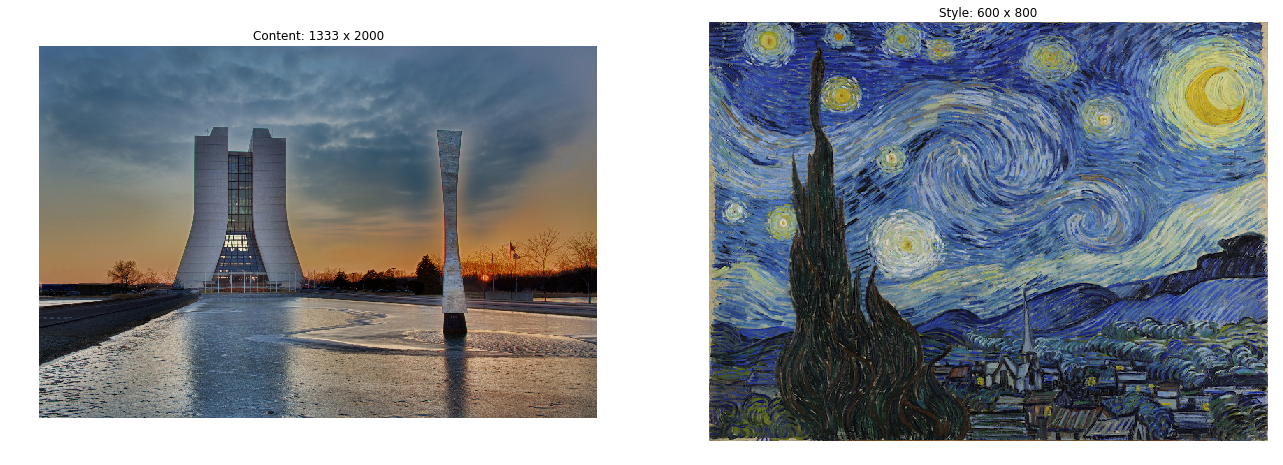

In [62]:
show_img_pair(raw=raw_source, normed=raw_style,  
              raw_title='Content', normed_title='Style', interpolation=None,
              raw_type='uint8', normed_type='uint8')

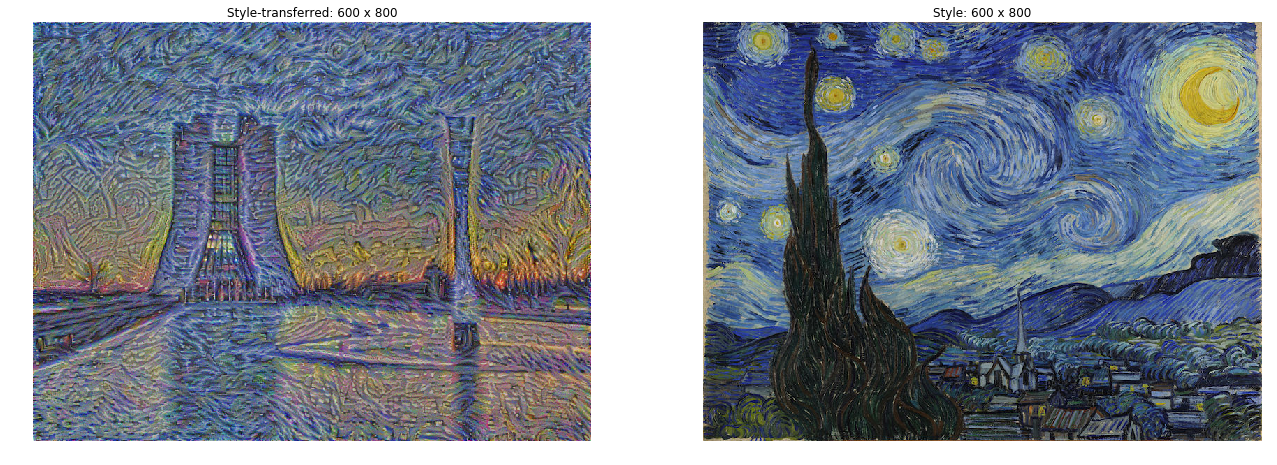

In [63]:
show_img_pair(raw=np.clip((result_image + VGG_MEAN_VALUES)[0], 0, 255), normed=raw_style,  
              raw_title='Style-transferred', normed_title='Style', interpolation=None,
              raw_type='uint8', normed_type='uint8')

This is only after 100 iterations - the more you run, the better it gets! (Up to a point, of course - tuning hyperparameters is important also.)

In [64]:
fig = plt.figure(figsize=(22,38))
gs = plt.GridSpec(5, 2)

def make_plot(img_path, title_text, grid_value):
    img = plt.imread(img_path)
    ax = plt.subplot(grid_value)
    ax.axis('off')
    im = ax.imshow(img, interpolation=None)
    plt.title(title_text)

make_plot('./example_results/finals/apaper_0499.png', 'Paper settings, 500 iters', gs[0])
make_plot('./example_results/finals/experiment1_0499.png', 'Level-5 content; 1-3 style, 500 iters', gs[1])
make_plot('./example_results/finals/experiment2_0499.png', 'Level-5 content; 1-4 style w/weights modified, 500 iters', gs[2])
make_plot('./example_results/finals/experiment3_0399.png', 'Level-5 content; no style, 400 iters', gs[3])
make_plot('./example_results/finals/experiment4_0499.png', 'No content; 1-5 style, 500 iters', gs[4])
make_plot('./example_results/finals/experiment5_0499.png', 'No content; 1-5 style; pure noise, 500 iters', gs[5])
make_plot('./example_results/finals/experiment6_0499.png', 'Level-4 content; 1-5 style; high noise, 500 iters', gs[6])
make_plot('./example_results/finals/fermi_cezanne_papersettings_0499.png', 'Paper settings, Cezanne fruit, 500 iters', gs[7])
make_plot('./example_results/finals/fermi_monet_papersettings_0149.png', 'Paper settings, Monet lillies, 150 iters', gs[8])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
